In [190]:
import csv
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Q1: Do the fields in Computer and Mathematical earn most money?

In [109]:
jobs = pd.read_csv('occupations.csv')

#transfer the H_MEAN or A_MEAN or JOBS_1000 number from string to float
jobs['A_MEAN'] = jobs['A_MEAN'].str.replace(',', '')
jobs['TOT_EMP'] = jobs['TOT_EMP'].str.replace(',', '')
jobs['A_MEAN'] = pd.to_numeric(jobs.A_MEAN, errors='coerce')
jobs['H_MEAN'] = pd.to_numeric(jobs.H_MEAN, errors='coerce')
jobs['TOT_EMP'] = pd.to_numeric(jobs.TOT_EMP, errors='coerce')

#drop the word'Occupations' in each row of OCC_TITLE
jobs['OCC_TITLE'] = jobs['OCC_TITLE'].str.replace('Occupations', '')

#delete the rows without value
job=jobs[jobs['H_MEAN'].notnull() & jobs['A_MEAN'].notnull()]

#filter the data without'major'
major = job[job['OCC_GROUP'].str.contains('major')]
major

,PRIM_STATE,AREA,AREA_NAME,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC QUOTIENT,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
1,CA,31080,"Los Angeles-Long Beach-Anaheim, CA",11-0000,Management,major,330970.0,1.1,57.225,1.13,...,53.29,77.60,#,"48,320","72,550","110,850","161,410",#,NaN,NaN
34,CA,31080,"Los Angeles-Long Beach-Anaheim, CA",13-0000,Business and Financial Operations,major,352020.0,1.3,60.864,1.17,...,34.59,46.82,61.48,"38,840","52,850","71,950","97,380","127,870",NaN,NaN
66,CA,31080,"Los Angeles-Long Beach-Anaheim, CA",15-0000,Computer and Mathematical,major,161410.0,2.6,27.908,0.94,...,42.65,57.34,71.71,"43,460","61,660","88,710","119,270","149,160",NaN,NaN
85,CA,31080,"Los Angeles-Long Beach-Anaheim, CA",17-0000,Architecture and Engineering,major,100720.0,2.5,17.414,0.98,...,43.20,58.19,74.02,"49,820","66,190","89,850","121,040","153,960",NaN,NaN
120,CA,31080,"Los Angeles-Long Beach-Anaheim, CA",19-0000,"Life, Physical, and Social Science",major,47570.0,6.1,8.225,1.00,...,33.62,47.08,59.46,"34,950","47,500","69,930","97,930","123,680",NaN,NaN
158,CA,31080,"Los Angeles-Long Beach-Anaheim, CA",21-0000,Community and Social Service,major,85010.0,3.1,14.698,1.02,...,24.48,35.36,45.92,"27,640","36,280","50,920","73,550","95,510",NaN,NaN
177,CA,31080,"Los Angeles-Long Beach-Anaheim, CA",23-0000,Legal,major,51820.0,2.6,8.959,1.17,...,49.61,81.51,#,"38,910","59,390","103,200","169,540",#,NaN,NaN
186,CA,31080,"Los Angeles-Long Beach-Anaheim, CA",25-0000,"Education, Training, and Library",major,332170.0,1.7,57.432,0.93,...,26.39,39.94,50.58,"26,610","36,140","54,890","83,070","105,200",NaN,NaN
246,CA,31080,"Los Angeles-Long Beach-Anaheim, CA",27-0000,"Arts, Design, Entertainment, Sports, and Media",major,185700.0,2.7,32.107,2.37,...,30.23,47.48,76.95,"27,120","38,860","62,880","98,760","160,050",NaN,NaN
288,CA,31080,"Los Angeles-Long Beach-Anaheim, CA",29-0000,Healthcare Practitioners and Technical,major,287320.0,2.2,49.677,0.84,...,37.69,53.39,72.30,"35,390","51,520","78,390","111,060","150,390",NaN,NaN


In [93]:
#caulculate the average of income per hour/year of occupations in U.S. major states
H_MEAN_all = major.groupby(['OCC_TITLE'])[['H_MEAN']].mean()
print(H_MEAN_all)
A_MEAN_all = major.groupby(['OCC_TITLE'])[['A_MEAN']].mean()
print(A_MEAN_all)

                                                    H_MEAN
OCC_TITLE                                                 
Architecture and Engineering                     43.160000
Arts, Design, Entertainment, Sports, and Media   31.148182
Building and Grounds Cleaning and Maintenance    14.767273
Business and Financial Operations                39.732727
Community and Social Service                     24.668182
Computer and Mathematical                        45.338182
Construction and Extraction                      27.202727
Education, Training, and Library                 28.680000
Farming, Fishing, and Forestry                   14.863636
Food Preparation and Serving Related             12.608182
Healthcare Practitioners and Technical           42.223636
Healthcare Support                               15.958182
Installation, Maintenance, and Repair            24.651818
Legal                                            57.131818
Life, Physical, and Social Science               37.7518

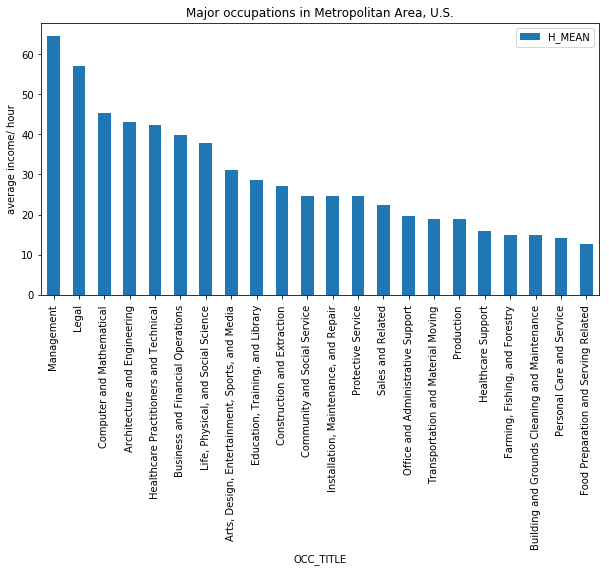

In [94]:
# sort the income in descending order, and use a bar chart

H_MEAN_all.sort_values("H_MEAN",ascending=False).plot(kind='bar', figsize=(10,5))
plt.ylabel('average income/ hour')
plt.title('Major occupations in Metropolitan Area, U.S.')


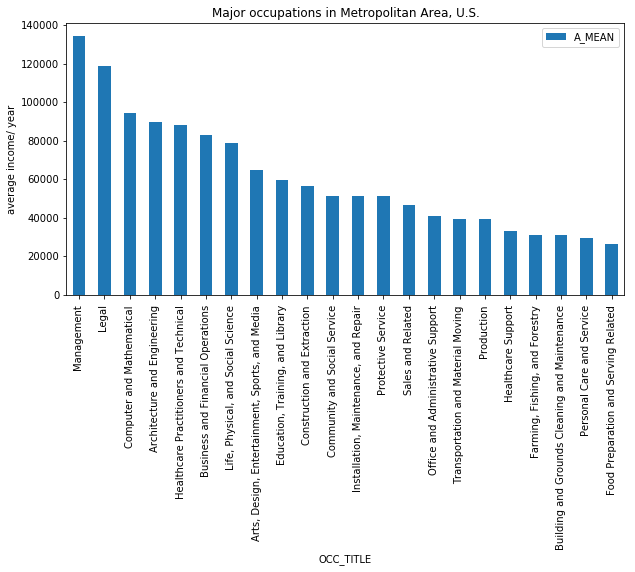

In [95]:
# sort the income in descending order, and use a bar chart
A_MEAN_all.sort_values("A_MEAN",ascending=False).plot(kind='bar',figsize=(10,5))
plt.ylabel('average income/ year')
plt.title('Major occupations in Metropolitan Area, U.S.')

In [179]:
#filter the data without'CA'
major_sub = major[major['AREA_NAME'].str.contains('San Francisco-Oakland-Hayward, CA')]
major_sub.head()

,PRIM_STATE,AREA,AREA_NAME,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC QUOTIENT,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
779,CA,41860,"San Francisco-Oakland-Hayward, CA",11-0000,Management,major,162760.0,1.3,71.917,1.42,...,64.42,91.66,#,"58,940","88,430","134,000","190,650",#,NaN,NaN
814,CA,41860,"San Francisco-Oakland-Hayward, CA",13-0000,Business and Financial Operations,major,177570.0,1.4,78.465,1.51,...,40.62,55.38,75.67,"48,850","62,970","84,480","115,190","157,390",NaN,NaN
845,CA,41860,"San Francisco-Oakland-Hayward, CA",15-0000,Computer and Mathematical,major,135380.0,2.2,59.822,2.02,...,53.52,67.93,79.43,"59,200","82,140","111,330","141,290","165,200",NaN,NaN
863,CA,41860,"San Francisco-Oakland-Hayward, CA",17-0000,Architecture and Engineering,major,52030.0,3.5,22.992,1.29,...,46.19,60.44,75.59,"53,780","70,010","96,080","125,700","157,230",NaN,NaN
896,CA,41860,"San Francisco-Oakland-Hayward, CA",19-0000,"Life, Physical, and Social Science",major,41040.0,2.6,18.134,2.21,...,41.09,57.03,73.62,"43,300","58,730","85,470","118,630","153,140",NaN,NaN


In [194]:
#caulculate the average of income per hour/year of occupations in C.A.
H_MEAN_sub = major_sub.groupby(['OCC_TITLE'])[['H_MEAN']].mean()
print(H_MEAN_sub)
A_MEAN_sub = major_sub.groupby(['OCC_TITLE'])[['A_MEAN']].mean()
print(A_MEAN_sub)

                                                 H_MEAN
OCC_TITLE                                              
Architecture and Engineering                      48.45
Arts, Design, Entertainment, Sports, and Media    34.38
Building and Grounds Cleaning and Maintenance     17.48
Business and Financial Operations                 46.32
Community and Social Service                      27.44
Computer and Mathematical                         54.04
Construction and Extraction                       32.37
Education, Training, and Library                  30.95
Farming, Fishing, and Forestry                    16.09
Food Preparation and Serving Related              14.76
Healthcare Practitioners and Technical            51.75
Healthcare Support                                19.81
Installation, Maintenance, and Repair             28.16
Legal                                             69.41
Life, Physical, and Social Science                44.95
Management                                      

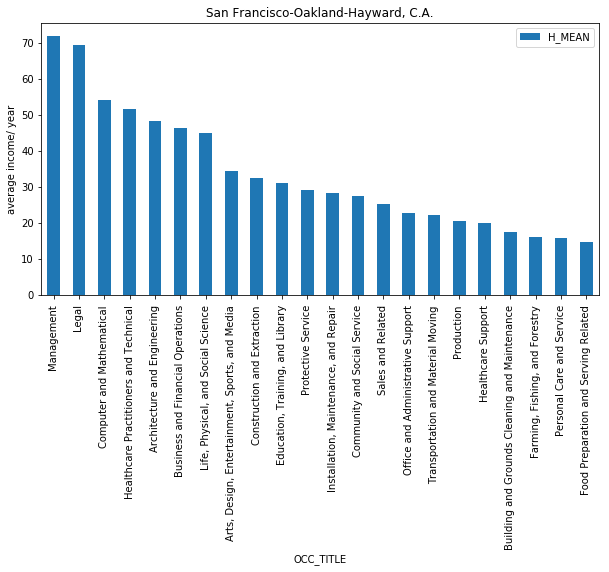

In [197]:
# sort the income in descending order, and use a bar chart
H_MEAN_sub.sort_values("H_MEAN",ascending=False).plot(kind='bar',figsize=(10,5))
plt.ylabel('average income/ year')
plt.title('San Francisco-Oakland-Hayward, C.A.')

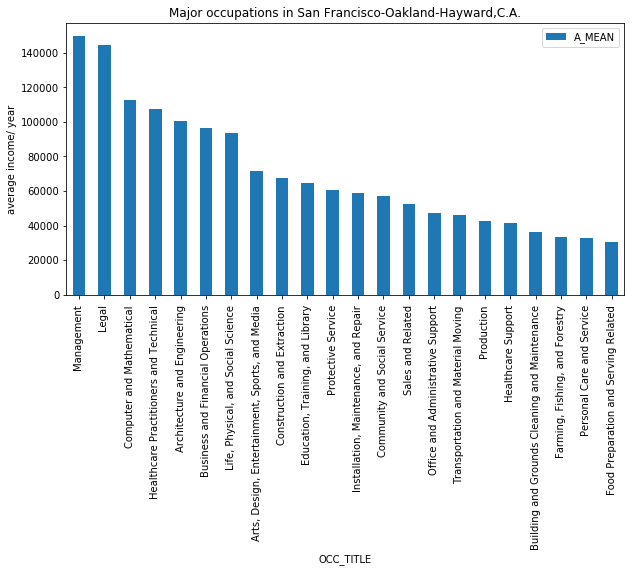

In [170]:
# sort the income in descending order, and use a bar chart
A_MEAN_sub.sort_values("A_MEAN",ascending=False).plot(kind='bar',figsize=(10,5))
plt.ylabel('average income/ year')
plt.title('Major occupations in San Francisco-Oakland-Hayward,C.A.')

In [ ]:
#Q2:Does employment rate distributes equally among the careers?

In [134]:
#delete the rows without value
job_TOTEMP=jobs[jobs['TOT_EMP'].notnull()]

#filter the data without'major'
major_TOTEMP = job_TOTEMP[job_TOTEMP['OCC_GROUP'].str.contains('major')]
major_TOTEMP.head()

,PRIM_STATE,AREA,AREA_NAME,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC QUOTIENT,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
1,CA,31080,"Los Angeles-Long Beach-Anaheim, CA",11-0000,Management,major,330970.0,1.1,57.225,1.13,...,53.29,77.60,#,"48,320","72,550","110,850","161,410",#,NaN,NaN
34,CA,31080,"Los Angeles-Long Beach-Anaheim, CA",13-0000,Business and Financial Operations,major,352020.0,1.3,60.864,1.17,...,34.59,46.82,61.48,"38,840","52,850","71,950","97,380","127,870",NaN,NaN
66,CA,31080,"Los Angeles-Long Beach-Anaheim, CA",15-0000,Computer and Mathematical,major,161410.0,2.6,27.908,0.94,...,42.65,57.34,71.71,"43,460","61,660","88,710","119,270","149,160",NaN,NaN
85,CA,31080,"Los Angeles-Long Beach-Anaheim, CA",17-0000,Architecture and Engineering,major,100720.0,2.5,17.414,0.98,...,43.20,58.19,74.02,"49,820","66,190","89,850","121,040","153,960",NaN,NaN
120,CA,31080,"Los Angeles-Long Beach-Anaheim, CA",19-0000,"Life, Physical, and Social Science",major,47570.0,6.1,8.225,1.00,...,33.62,47.08,59.46,"34,950","47,500","69,930","97,930","123,680",NaN,NaN


In [202]:
#caulculate the average of income per hour/year of occupations in U.S. major states
sum_TOTEMP = major_TOTEMP.groupby(['OCC_TITLE'])[['TOT_EMP']].sum()

#create a column for the percentage of TOT_EMP
EMP_PERCENTAGE = sum_TOTEMP['TOT_EMP']/ sum_TOTEMP['TOT_EMP'].sum()

print(sum_TOTEMP.head())
print(EMP_PERCENTAGE.head())

                                                   TOT_EMP
OCC_TITLE                                                 
Architecture and Engineering                      663360.0
Arts, Design, Entertainment, Sports, and Media    770650.0
Building and Grounds Cleaning and Maintenance    1226000.0
Business and Financial Operations                2574460.0
Community and Social Service                      578040.0
OCC_TITLE
Architecture and Engineering                       0.016606
Arts, Design, Entertainment, Sports, and Media     0.019292
Building and Grounds Cleaning and Maintenance      0.030690
Business and Financial Operations                  0.064446
Community and Social Service                       0.014470
Name: TOT_EMP, dtype: float64


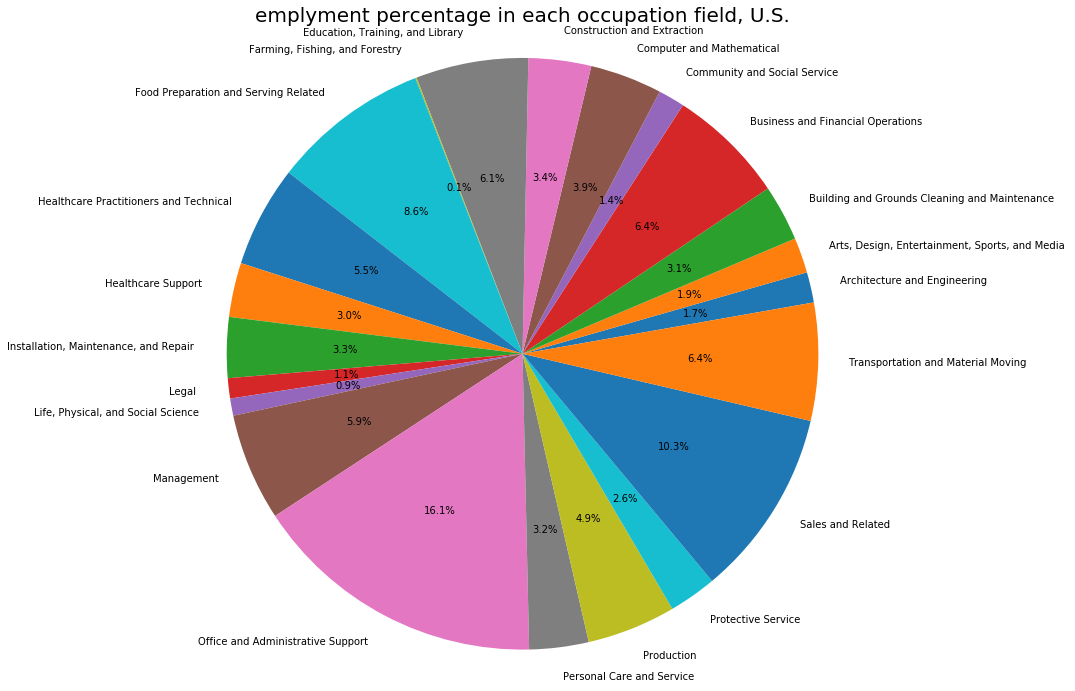

In [181]:
# Create a pie chart
# set the pie size
plt.figure(figsize=(30,12))
#Plot Video Game Sales in 1989 by Genre
plt.subplot(121)
#use the sum_TOTEMP data
plt.pie(sum_TOTEMP,
# with the labels being officer names
    labels=sum_TOTEMP.index,
    shadow=False,
# with the start angle at 10%
    startangle=10,
# with the percent listed as a fraction
    autopct='%1.1f%%')
# View the plot drop above
plt.axis('equal')
plt.title('emplyment percentage in each occupation field, U.S.',fontsize=20)
plt.show()

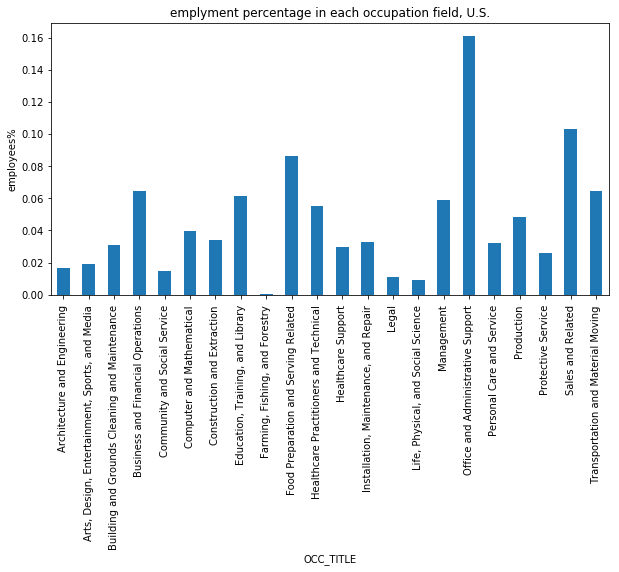

In [208]:
# use a bar chart
EMP_PERCENTAGE.plot(kind='bar',figsize=(10,5))
plt.ylabel('employees%')
plt.title('emplyment percentage in each occupation field, U.S.')